In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
train = pd.read_csv('./icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('./icr-identify-age-related-conditions/test.csv')
meta = pd.read_csv('./icr-identify-age-related-conditions/greeks.csv')
# train.describe()

In [297]:
train_init = train.copy()
train['Alpha'] = meta['Alpha'].copy()
train['Beta'] = meta['Beta']
train['Gamma'] = meta['Gamma']
train['Delta'] = meta['Delta']

**需要注意，能够下载的测试集并不完整，可能会出现训练集中没有的类别，对测试集的处理需要小心一点，否则会提交错误导致1 miss**

In [298]:
# 处理greeks
# Alpha为A的时候为0，其余为1
train['Alpha'] = train['Alpha'].apply(lambda x: 0 if x == 'A' else 1)
train.head(10)

Id        AB          AF          AH         AM         AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407   8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889   8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553   8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203   8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738   8.138688   
5  04517a3c90bd  0.209377  2615.81430   85.200147   8.541526   8.138688   
6  049232ca8356  0.348249  1733.65412   85.200147   8.377385  15.312480   
7  057287f2da6d  0.269199   966.45483   85.200147  21.174189   8.138688   
8  0594b00fb30a  0.346113  3238.43674   85.200147  28.888816   8.138688   
9  05f2bc0155cd  0.324748  5188.68207   85.200147  12.968687   8.138688   

         AX        AY         AZ          BC  ...          GE            GF  \
0  0.699861  0.025578   9.812214    5.555634  ...   72.611063   2003.810319   
1  3.632190  0.025578  13.517790    1.229900  ...   72.611063  27981.562750   
2  6.732840  0.025578  12.824570    1.229900  ...   88.609437  13676.957810   
3  3.685344  0.025578  11.053708    1.229900  ...   82.416803   2094.262452   
4  3.942255  0.054810   3.396778  102.151980  ...  146.109943   8524.370502   
5  4.013127  0.025578  12.547282    1.229900  ...   72.611063  24177.595550   
6  1.913544  0.025578   6.547778    1.229900  ...  192.453107   3332.467494   
7  4.987617  0.025578   9.408886    1.229900  ...  109.693986  21371.759850   
8  4.021986  0.025578   8.243016    3.626448  ...  147.218610   4589.611956   
9  4.593392  0.025578  10.685041    1.229900  ...   98.929757   5563.130949   

          GH          GI         GL  Class  Alpha  Beta  Gamma  Delta  
0  22.136229   69.834944   0.120343      1      1     C      G      D  
1  29.135430   32.131996  21.978000      0      0     C      M      B  
2  28.022851   35.192676   0.196941      0      0     C      M      B  
3  39.948656   90.493248   0.155829      0      0     C      M      B  
4  45.381316   36.262628   0.096614      1      1     B      F      B  
5  28.525186   82.527764  21.978000      0      0     C      M      B  
6  34.166222  100.086808   0.065096      0      0     C      M      B  
7  35.208102   31.424696   0.092873      0      0     C      M      B  
8  29.771721   54.675576   0.073416      0      0     C      M      B  
9  21.994831   33.300970  21.978000      0      0     B      M      B  

[10 rows x 62 columns]

In [299]:
# 将数据集中唯一的离散特征转为01，这可能表明患者的性别
train['EJ'] = train['EJ'].replace({'A': 0, 'B': 1})
test['EJ']  = test['EJ'].replace({'A': 0, 'B': 1})
train_init['EJ'] = train_init['EJ'].replace({'A': 0, 'B': 1})
# 缺失值处理，用中位数填充
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)
train_init.fillna(train_init.median(), inplace=True)
# 移除ID列
train_id = train['Id'].copy()
test_id  =  test['Id'].copy()
train = train.drop(['Id'], axis=1)
test  =  test.drop(['Id'], axis=1)
# train_id = train.drop(['Id'], axis=1, inplace=True)
# test_id  =  test.drop(['Id'], axis=1, inplace=True)
train_init_id = train_init.drop(['Id'], axis=1, inplace=True)
# 将离散变量分离出来
train_discrete = train[['EJ', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Class']]
# 将连续变量分离出来
train_continuous = train.drop(['EJ', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Class'], axis=1)

train.isnull().sum()

C:\Users\111\AppData\Local\Temp\ipykernel_14512\2407551820.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.median(), inplace=True)
C:\Users\111\AppData\Local\Temp\ipykernel_14512\2407551820.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.median(), inplace=True)
C:\Users\111\AppData\Local\Temp\ipykernel_14512\2407551820.py:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numer

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
Alpha    0
Beta     0
Gamma    0
Delta    0
dtype: int64

In [300]:
# test_id.head(10)

In [190]:
# 由于我们需要预测Alpha，Beta，Gamma和Delta以及class，通过可视化来判断这些特征与class之间的关系

def plot_distribution(data, target_col):
    # 将目标列加入到最后一列
    data_c = data.copy()
    data_c[target_col] = train_discrete[target_col]
    num_cols = 4
    num_rows = len(data_c.columns)
    fig, axes = plt.subplots(nrows=num_rows//4, ncols=num_cols, figsize=(20, num_rows))
    sns.set(font_scale=1.2, style='whitegrid')
    for i, col_name in enumerate(data_c.columns):
        if col_name != target_col:
            ax = axes[i // num_cols, i % num_cols]
            sns.kdeplot(data=data_c, x=data_c[col_name], hue=data_c[target_col], ax=ax, fill=True)
            ax.set_xlabel(col_name.title(), fontsize=14)
            ax.set_ylabel(target_col.title(), fontsize=14)
            ax.tick_params(axis='both', which='major', labelsize=12)
            # ax.legend([1, 0], title=target_col.title(), fontsize=12)
    plt.tight_layout()
    plt.show()

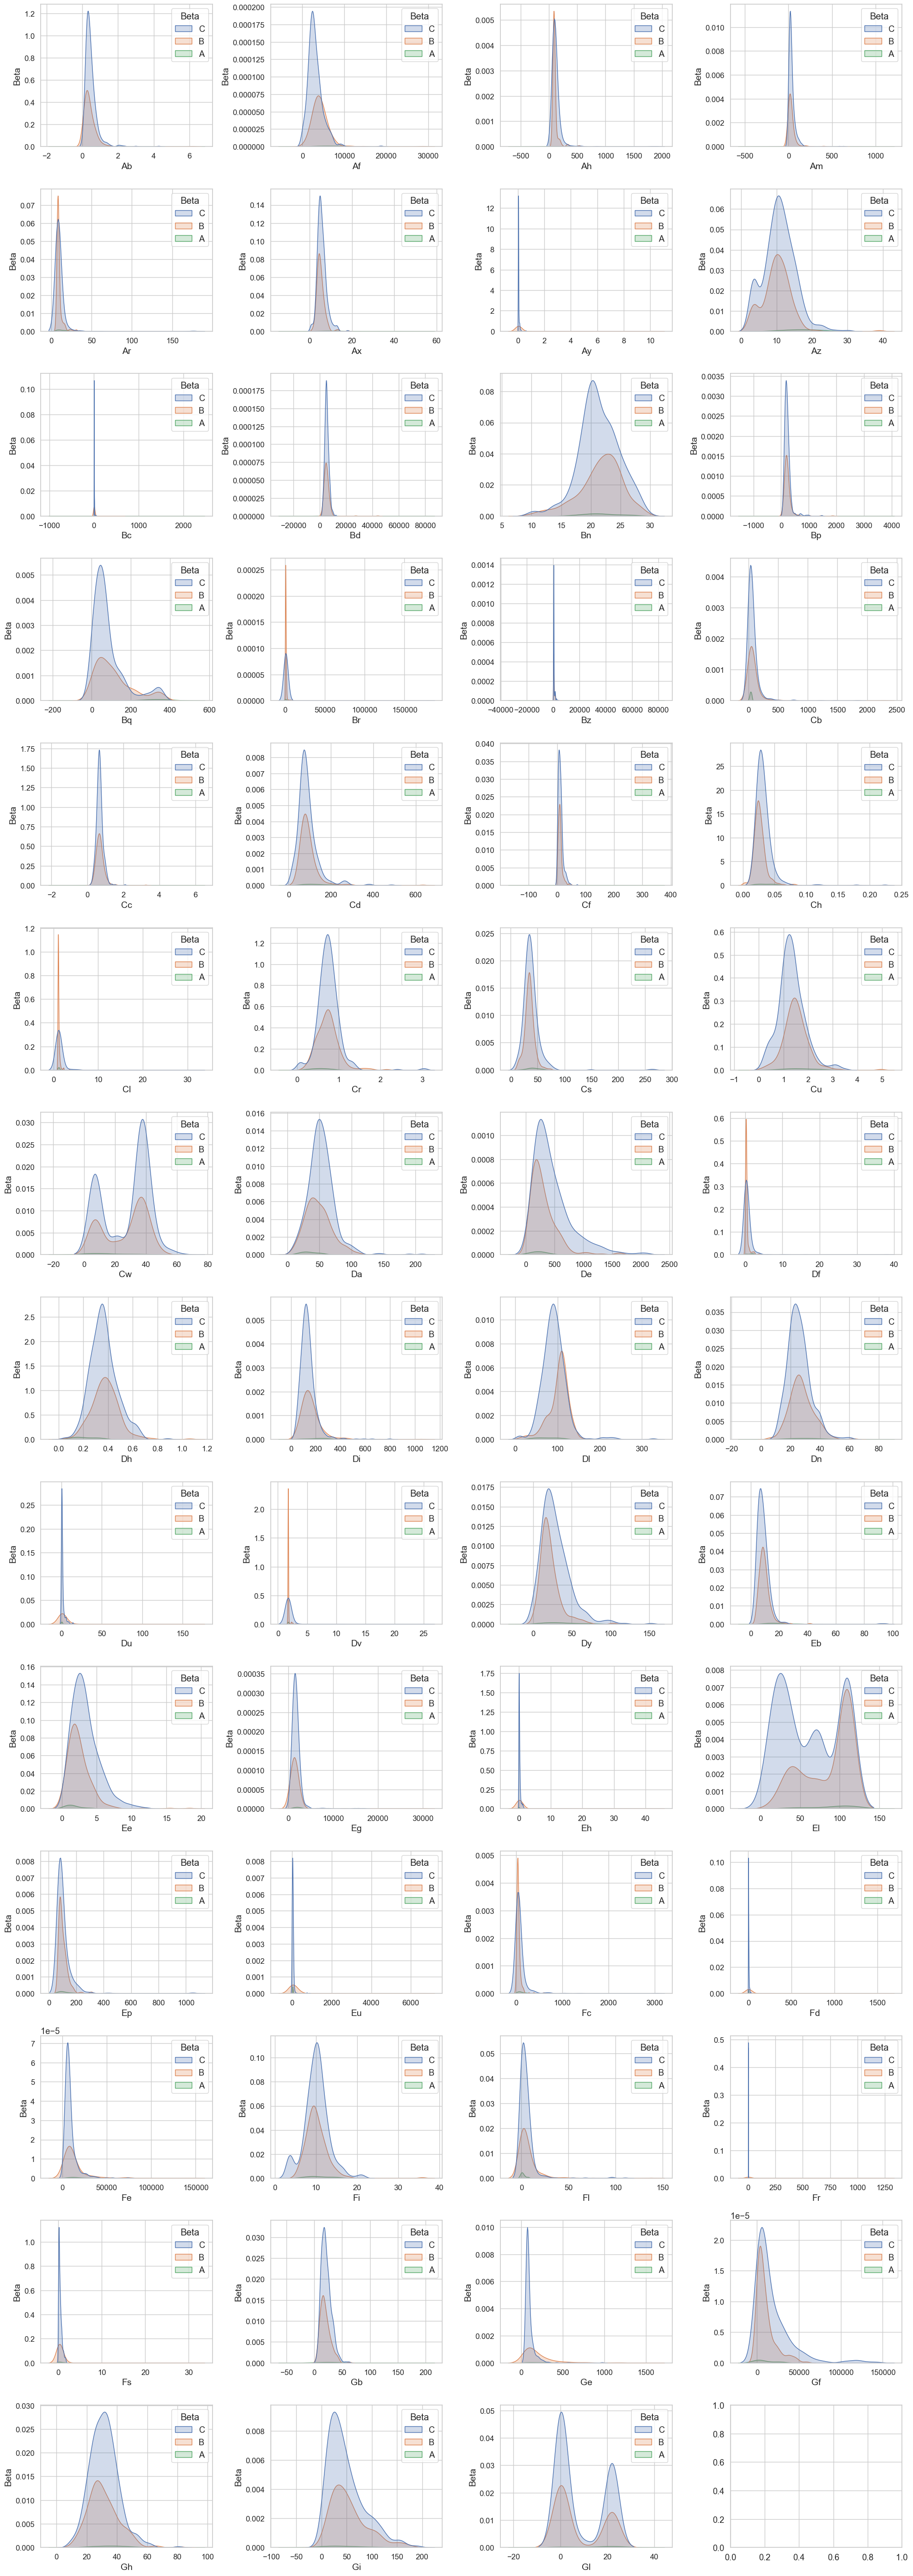

In [194]:
plot_distribution(train_continuous, "Beta")

C:\Users\111\AppData\Local\Temp\ipykernel_14512\1836291999.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_c, x=data_c[col_name], hue=data_c[target_col], ax=ax, fill=True)
C:\Users\111\AppData\Local\Temp\ipykernel_14512\1836291999.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_c, x=data_c[col_name], hue=data_c[target_col], ax=ax, fill=True)
C:\Users\111\AppData\Local\Temp\ipykernel_14512\1836291999.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_c, x=data_c[col_name], hue=data_c[target_col], ax=ax, fill=True)
C:\Users\111\AppData\Local\Temp\ipykernel_14512\1836291999.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns

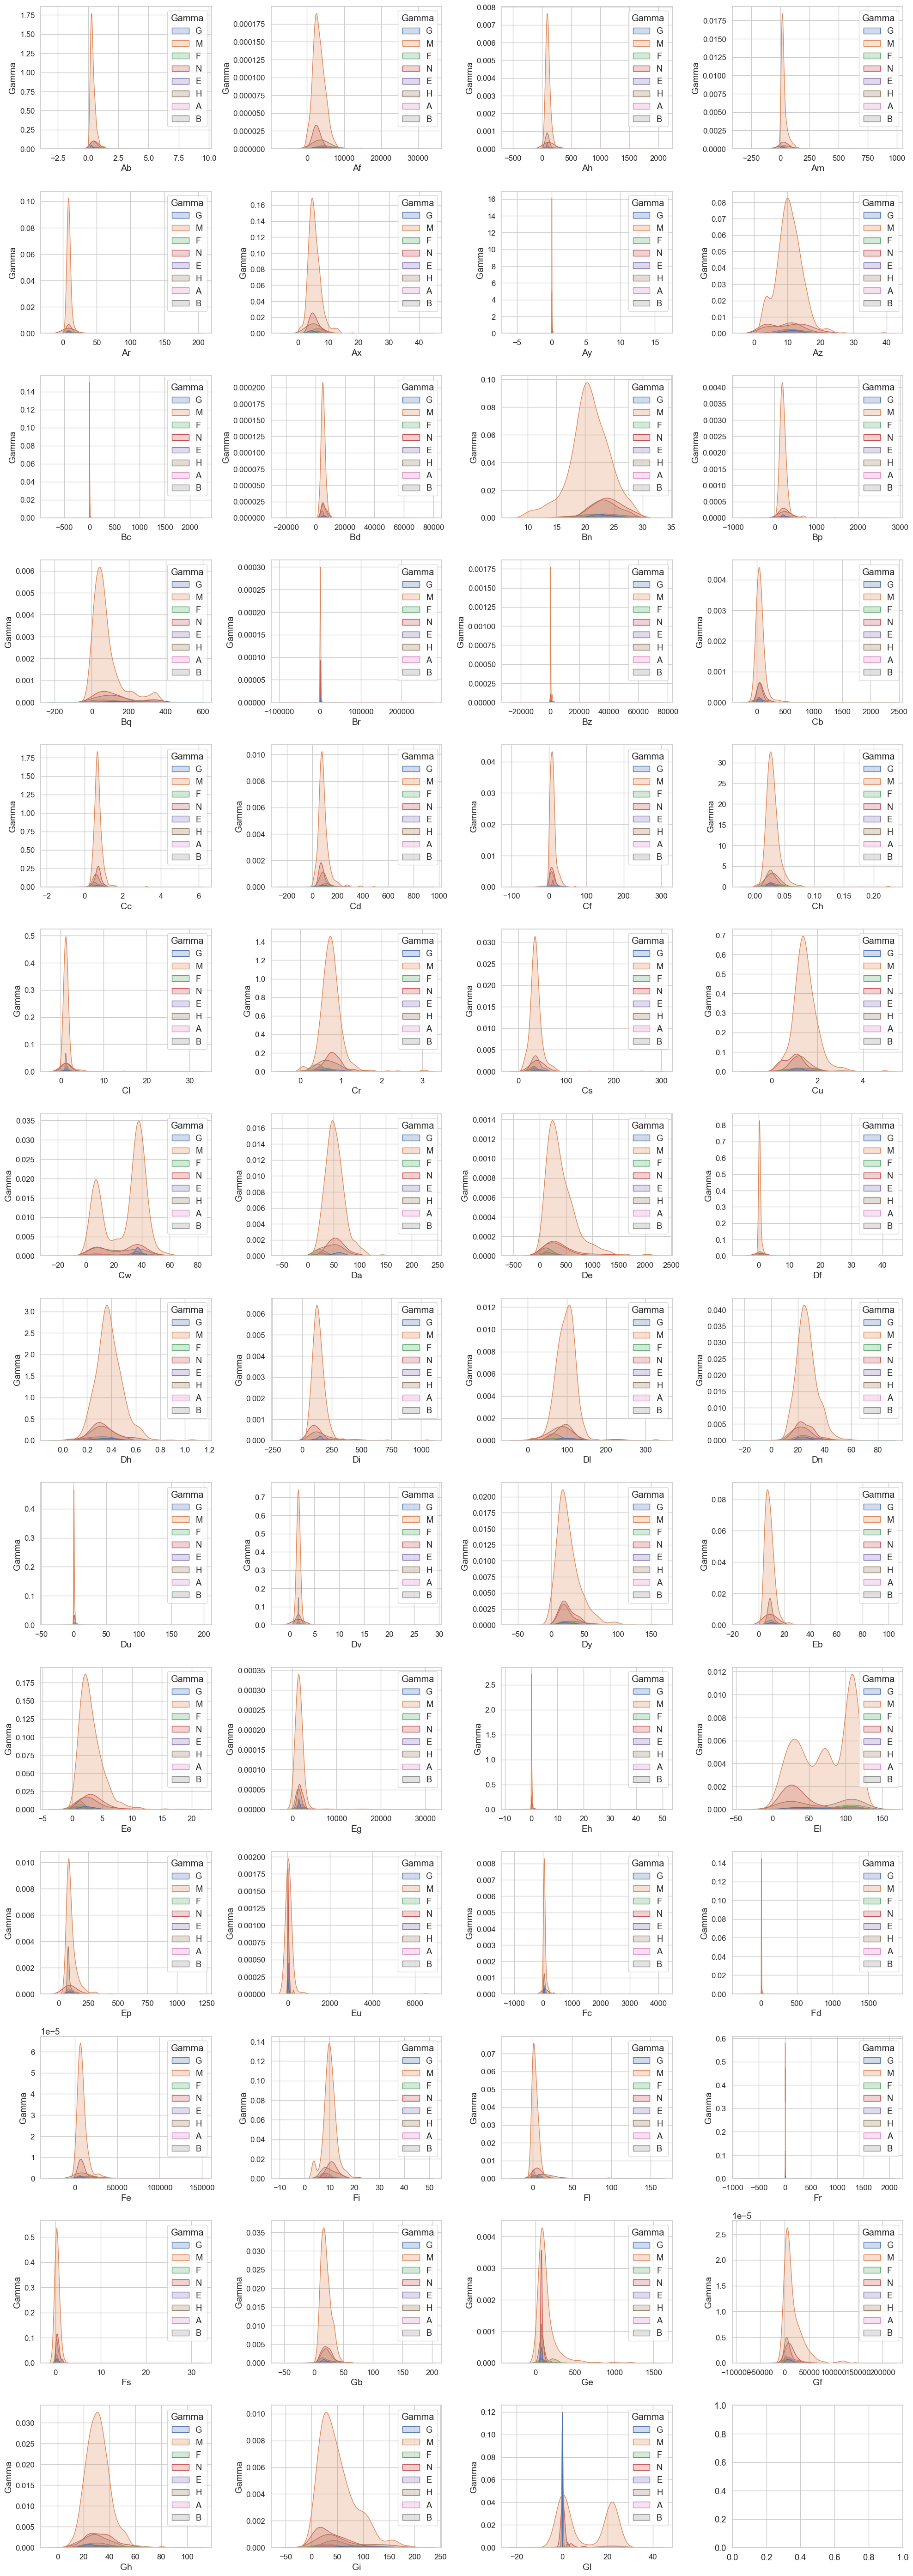

In [192]:
plot_distribution(train_continuous, "Gamma")

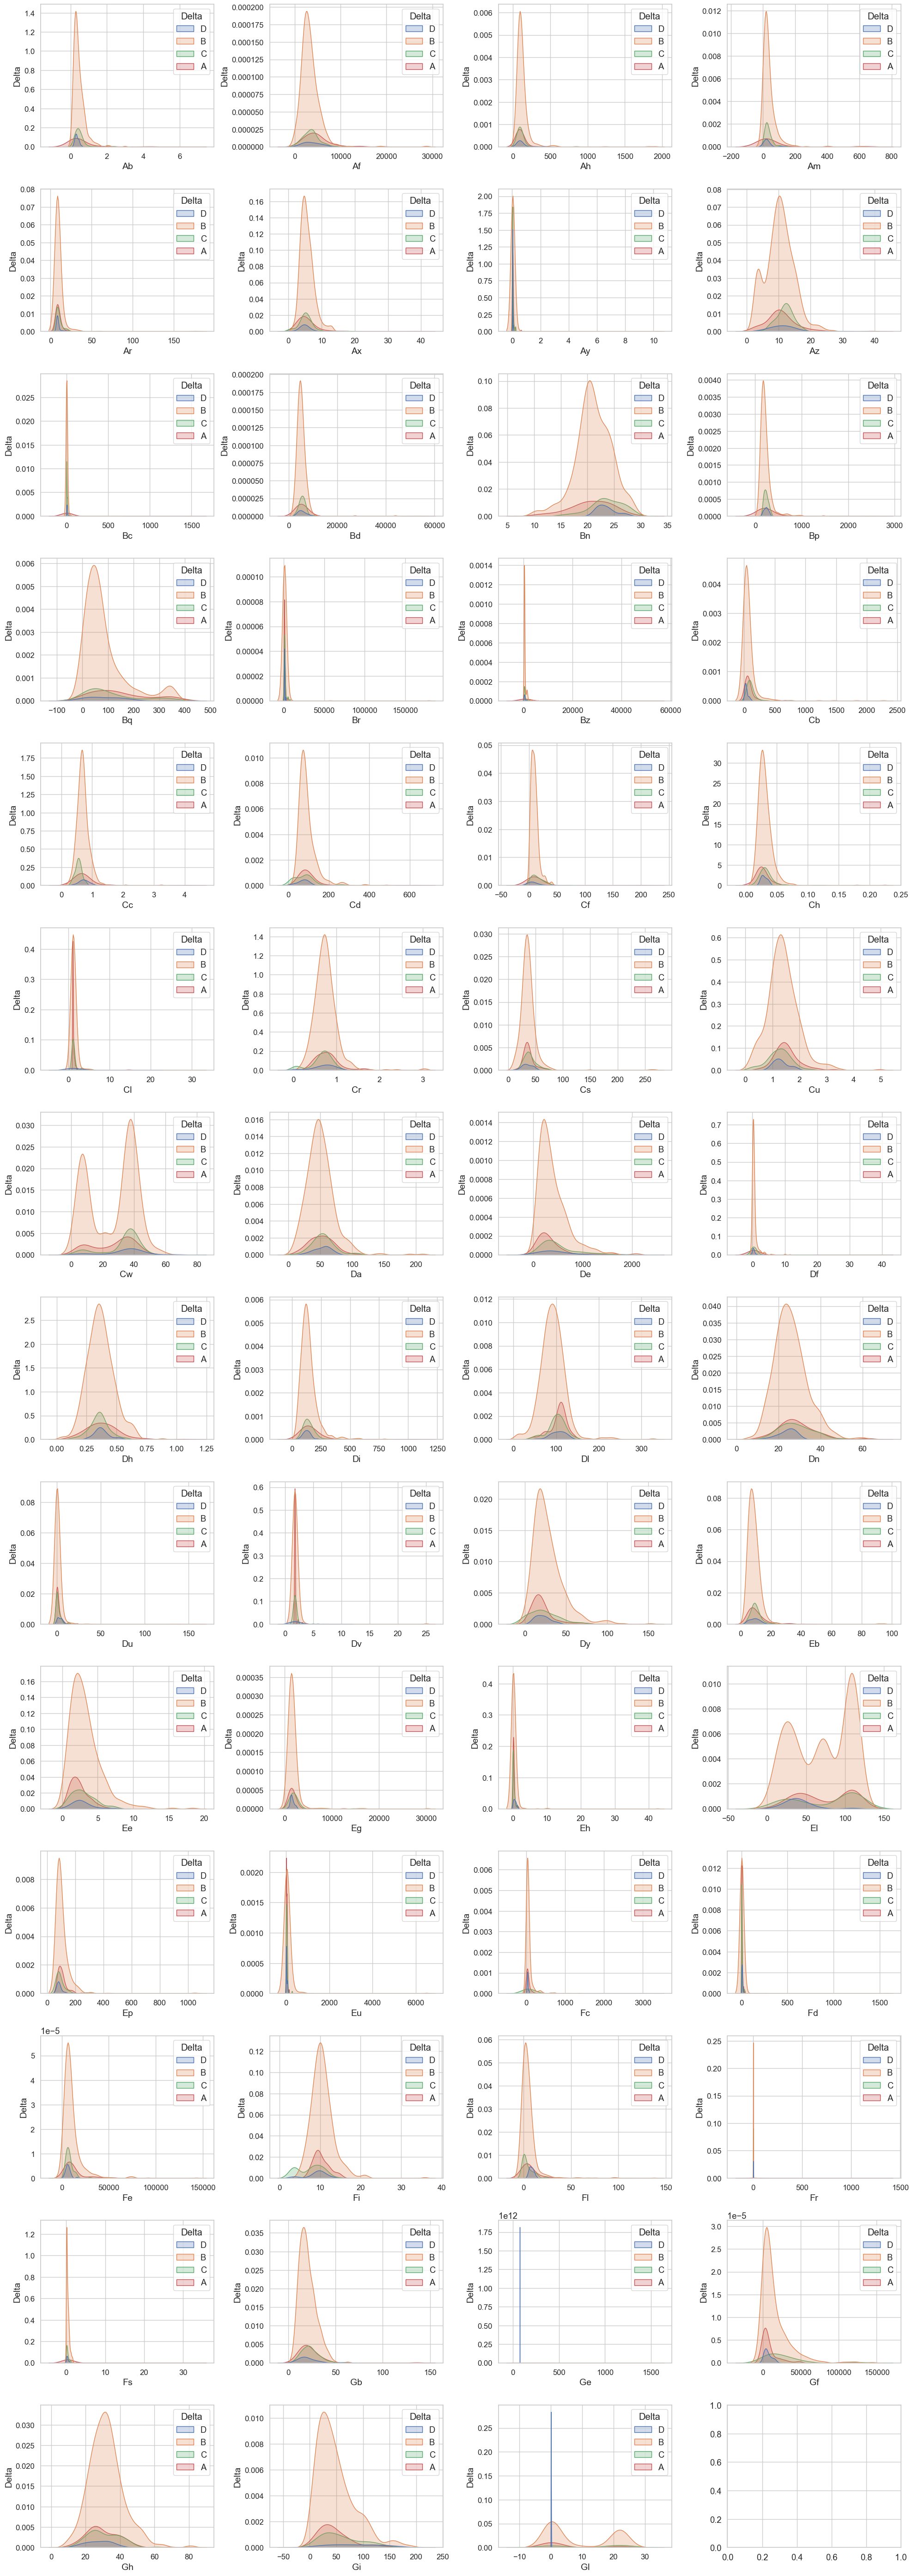

In [191]:
plot_distribution(train_continuous, "Delta")

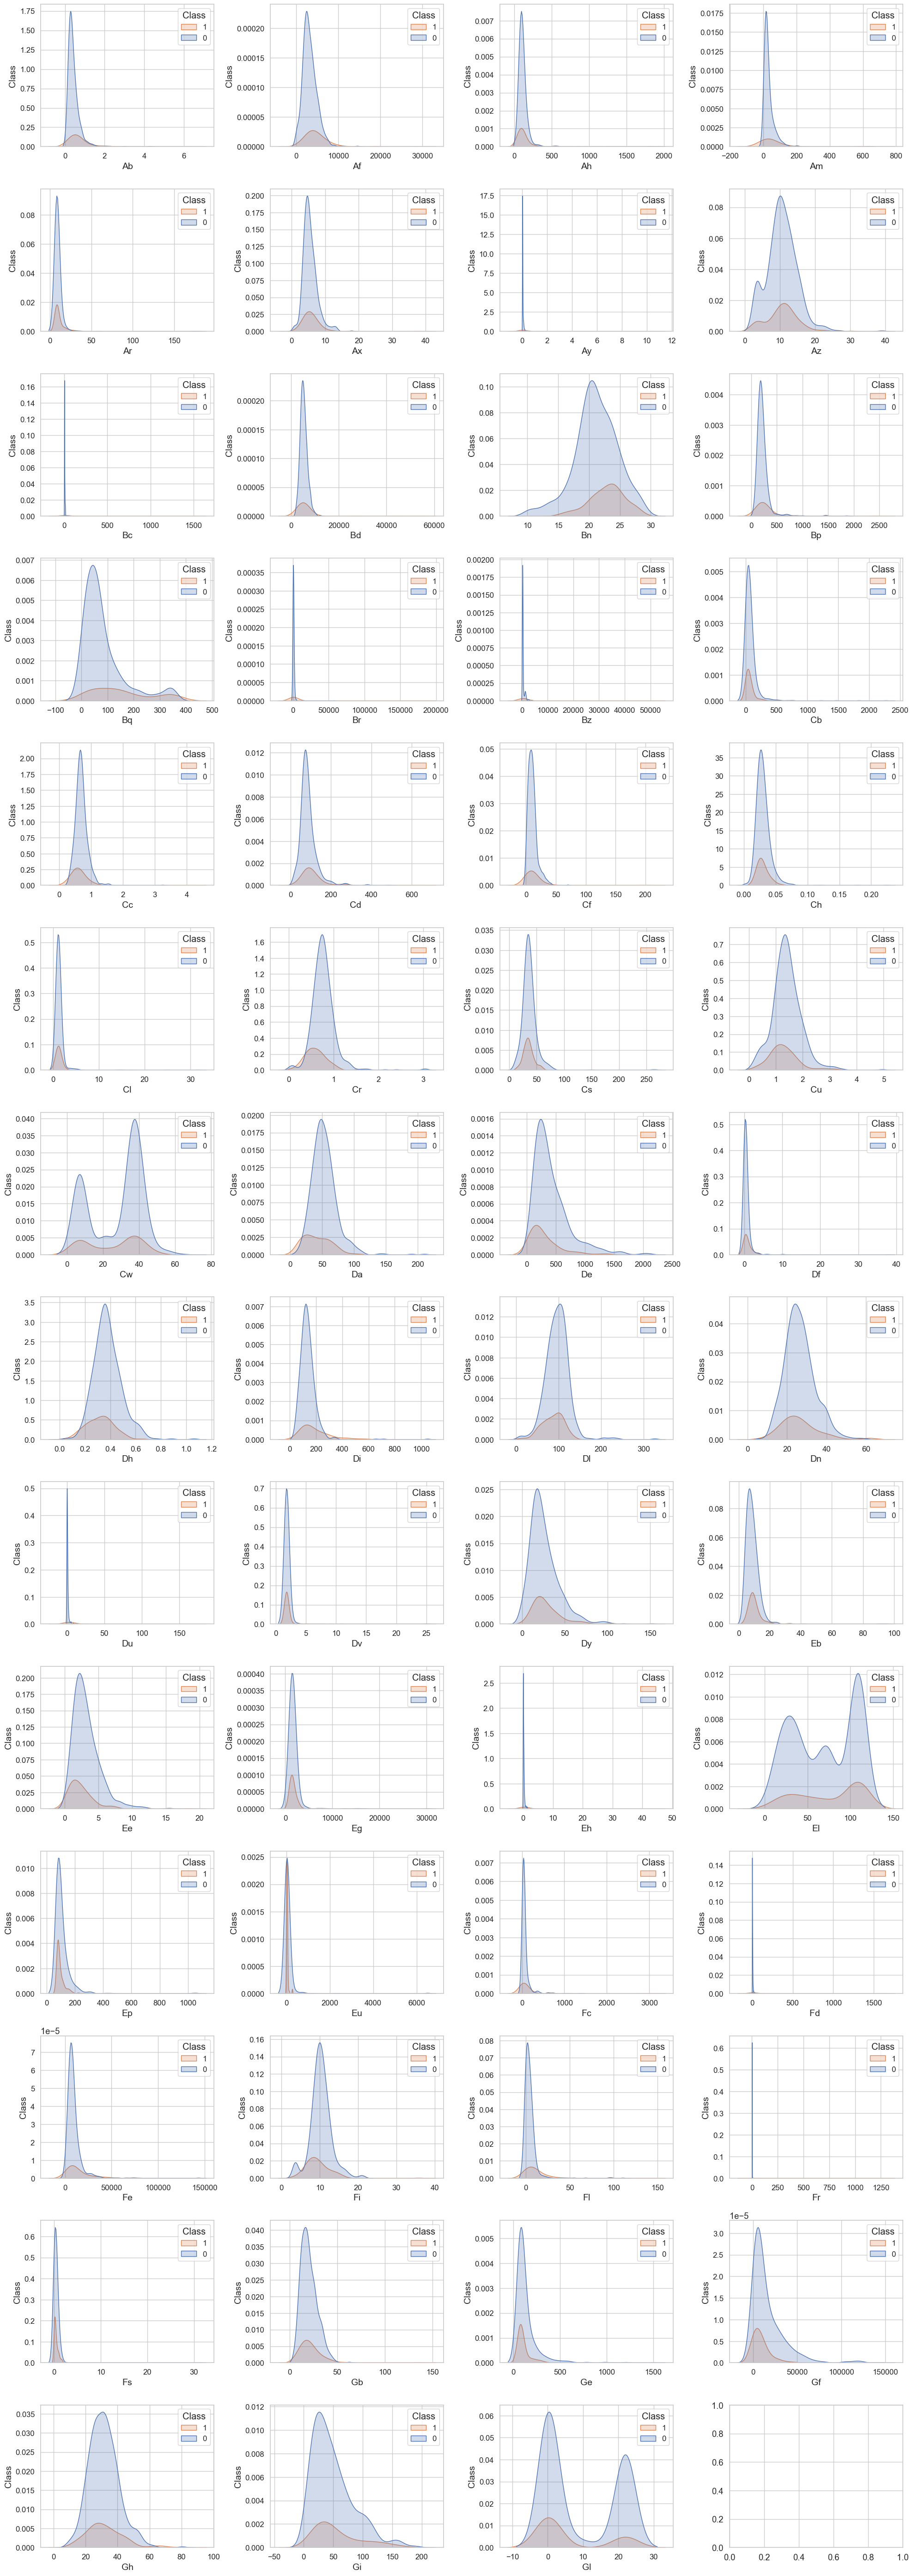

In [148]:
plot_distribution(train_continuous, "Class")

<AxesSubplot:xlabel='Delta', ylabel='Alpha'>

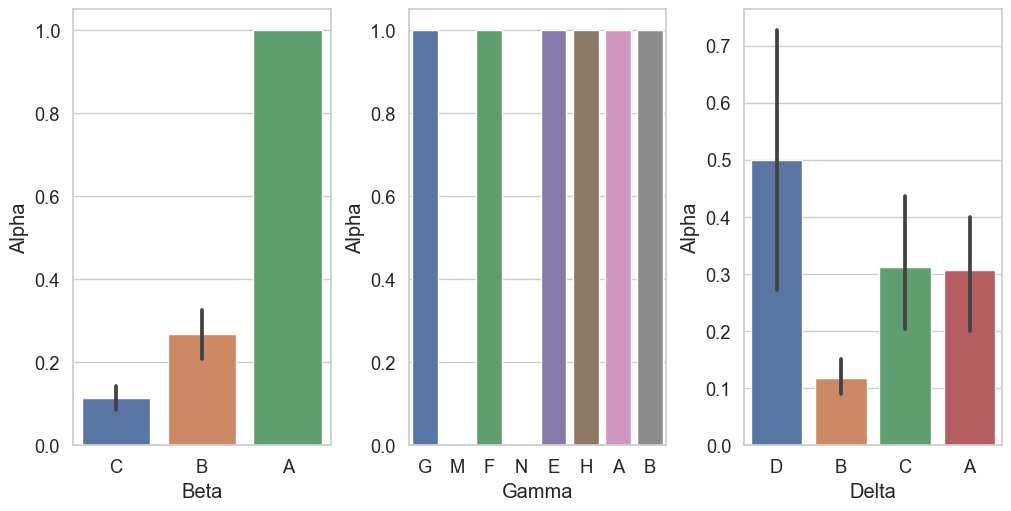

In [195]:
# 现在观察Beta，Gamma和Delta与Alpha之间的关系，我们需要预测Class，即为预测Alpha

fig, ax =plt.subplots(1,3,constrained_layout=True, figsize=(10, 5))
sns.barplot(x='Beta', y='Alpha', data=train_discrete, ax=ax[0])
sns.barplot(x='Gamma', y='Alpha', data=train_discrete, ax=ax[1])
sns.barplot(x='Delta', y='Alpha', data=train_discrete, ax=ax[2])

*注意，值越低，说明没有患病*
通过该图可以发现，gamma值为MN一定不会患病，Beta为C且Delta为B患病概率也较低
之后的预测策略是，先预测beta，gamma和delta的值，再通过三者的值来预测alpha的值
*额外注意应该将MN看为一类，GFEHAB看为一类，他们的分布都过于相近*

In [196]:
# 箱线图，观察离群点
# 本来是准备处理异常值的，但是通过discussion发现，这些异常值处理后模型并不会得到什么提升，所以就不处理了
# 而且个人认为这些异常值可能会决定患者的症状，所以保留

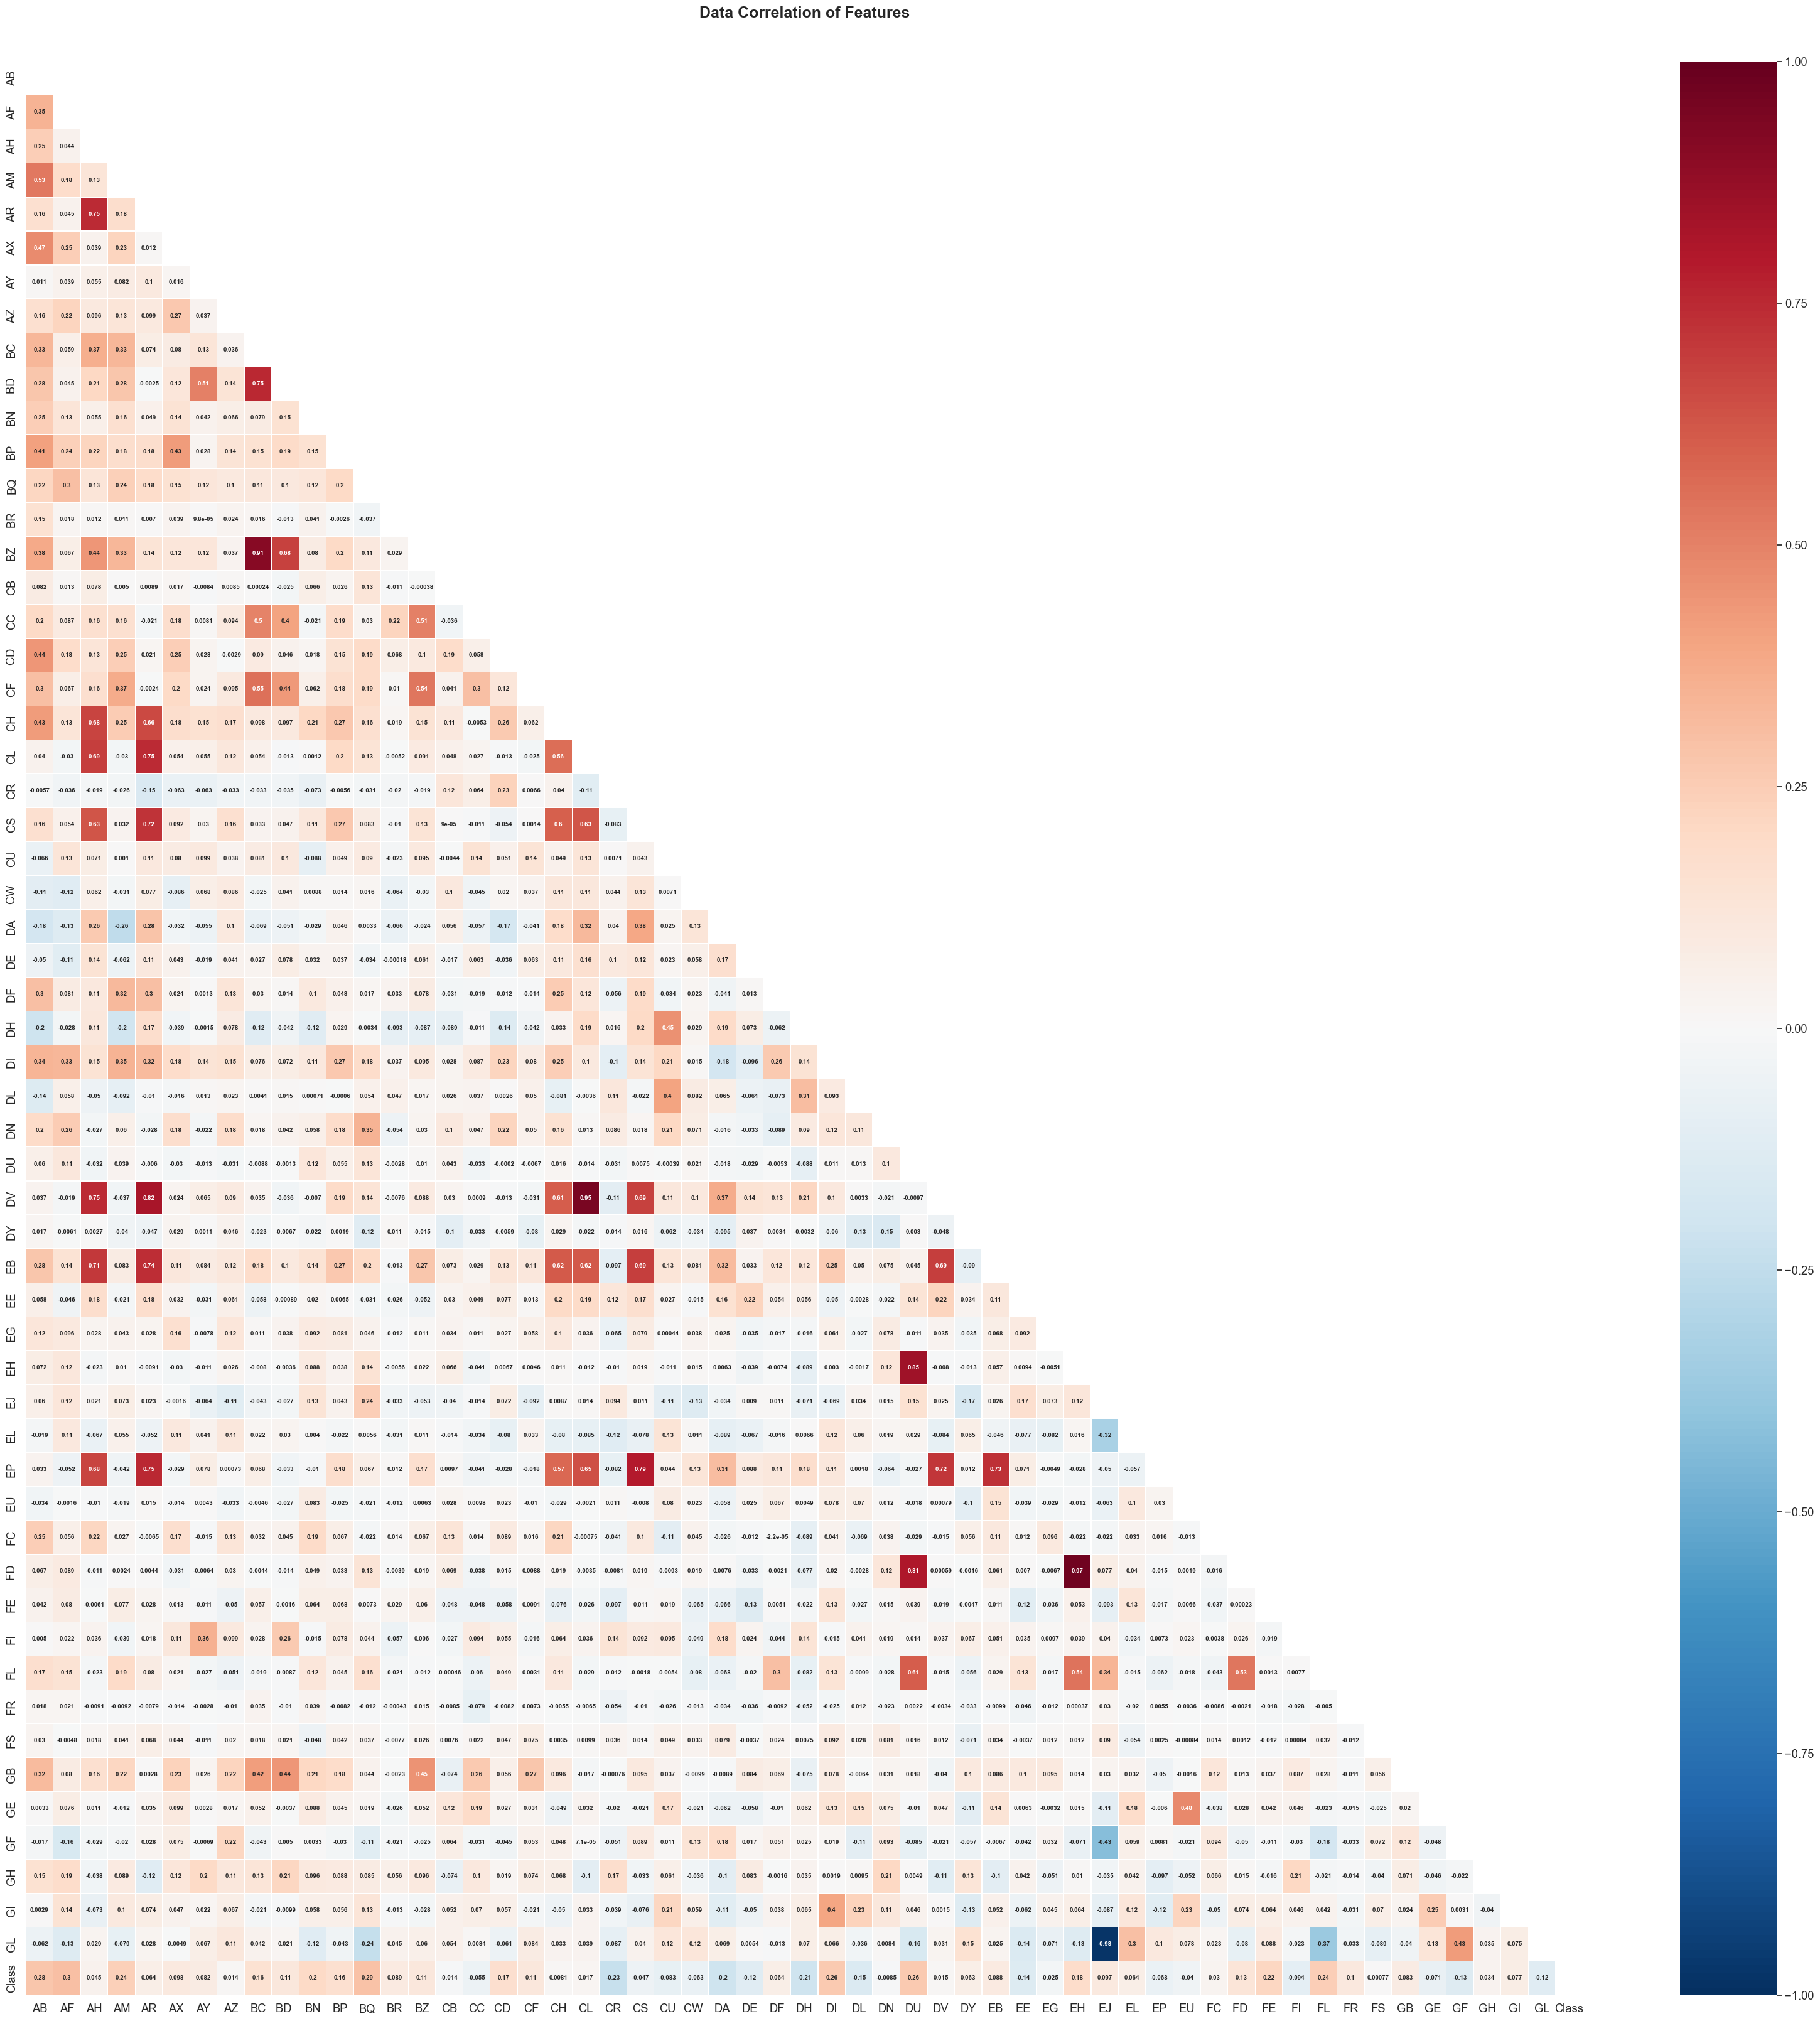

In [206]:
# 热力图，观察特征之间的相关性，删除相关性较强的特征
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(40, 40))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=18)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 7, "weight": "bold"},
                mask=mask)

plot_heatmap(train_init, title='Data')

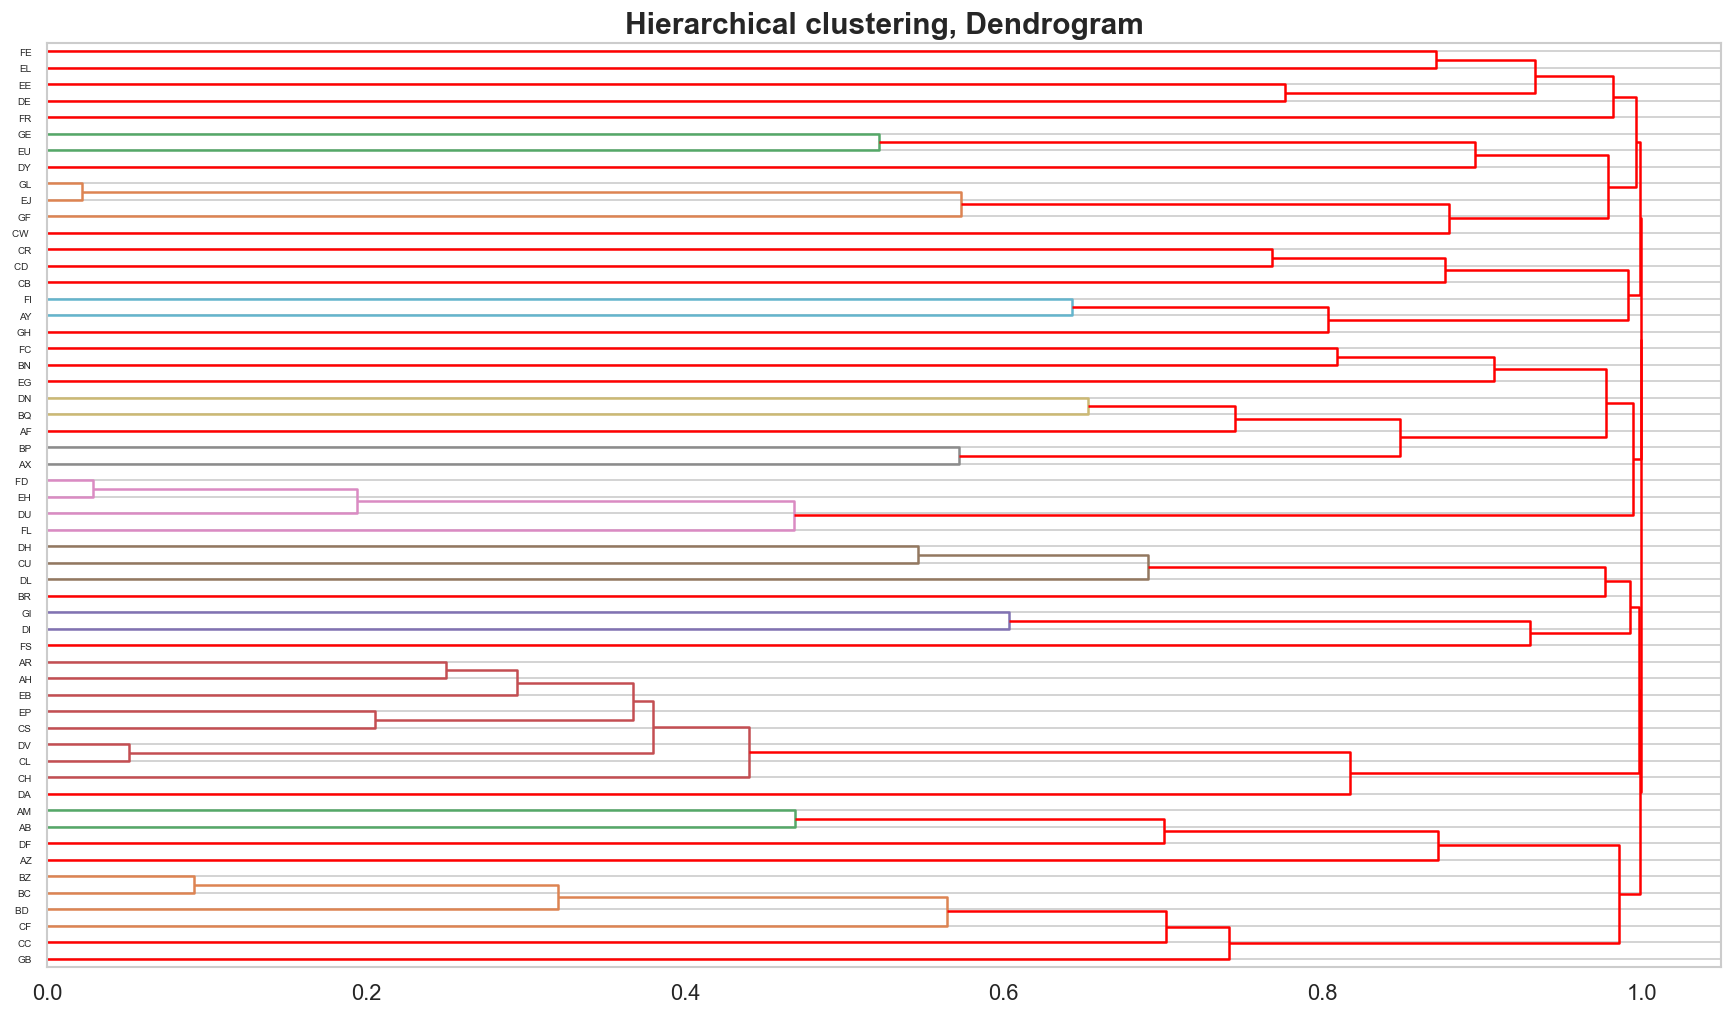

In [207]:
# 层次聚类

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

def hierarchical_clustering(data):
    fig, ax = plt.subplots(1, 1, figsize=(18, 10), dpi=120)
    correlations = data.corr()
    converted_corr = 1 - np.abs(correlations)
    Z = linkage(squareform(converted_corr), 'complete')
    
    dn = dendrogram(Z, labels=data.columns, ax=ax, above_threshold_color='#ff0000', orientation='right')
    hierarchy.set_link_color_palette(None)
    plt.grid(axis='x')
    plt.title('Hierarchical clustering, Dendrogram', fontsize=18, fontweight='bold')
    plt.show()

hierarchical_clustering(train_init.drop('Class', axis=1))

准备先通过删除部分相似度高的数据，如果后期效果不行的话，就用PCA降维了

In [225]:
train.head()

AB          AF          AH         AM        AR        AX        AY  \
0  0.209377  3109.03329   85.200147  22.394407  8.138688  0.699861  0.025578   
1  0.145282   978.76416   85.200147  36.968889  8.138688  3.632190  0.025578   
2  0.470030  2635.10654   85.200147  32.360553  8.138688  6.732840  0.025578   
3  0.252107  3819.65177  120.201618  77.112203  8.138688  3.685344  0.025578   
4  0.380297  3733.04844   85.200147  14.103738  8.138688  3.942255  0.054810   

          AZ          BC         BD   ...          GE            GF  \
0   9.812214    5.555634  4126.58731  ...   72.611063   2003.810319   
1  13.517790    1.229900  5496.92824  ...   72.611063  27981.562750   
2  12.824570    1.229900  5135.78024  ...   88.609437  13676.957810   
3  11.053708    1.229900  4169.67738  ...   82.416803   2094.262452   
4   3.396778  102.151980  5728.73412  ...  146.109943   8524.370502   

          GH         GI         GL  Class  Alpha  Beta  Gamma  Delta  
0  22.136229  69.834944   0.120343      1      1     C      G      D  
1  29.135430  32.131996  21.978000      0      0     C      M      B  
2  28.022851  35.192676   0.196941      0      0     C      M      B  
3  39.948656  90.493248   0.155829      0      0     C      M      B  
4  45.381316  36.262628   0.096614      1      1     B      F      B  

[5 rows x 61 columns]

In [302]:
# 特征处理
# 将gamma中的M和N都转为0，G，H，E，F，A，B的转为1
train['Gamma'] = train['Gamma'].replace({'M': 0, 'N': 0, 'G': 1, 'H': 1, 'E': 1, 'F': 1, 'A': 1, 'B': 1})
# 将Beta中的C0,B1,A2
train['Beta'] = train['Beta'].replace({'C': 0, 'B': 1, 'A': 2})
# 将Delta中的B0,A1,C1,D2
train['Delta'] = train['Delta'].replace({'B': 0, 'A': 1, 'C': 1, 'D': 2})

train.head()


AB          AF          AH         AM        AR        AX        AY  \
0  0.209377  3109.03329   85.200147  22.394407  8.138688  0.699861  0.025578   
1  0.145282   978.76416   85.200147  36.968889  8.138688  3.632190  0.025578   
2  0.470030  2635.10654   85.200147  32.360553  8.138688  6.732840  0.025578   
3  0.252107  3819.65177  120.201618  77.112203  8.138688  3.685344  0.025578   
4  0.380297  3733.04844   85.200147  14.103738  8.138688  3.942255  0.054810   

          AZ          BC         BD   ...          GE            GF  \
0   9.812214    5.555634  4126.58731  ...   72.611063   2003.810319   
1  13.517790    1.229900  5496.92824  ...   72.611063  27981.562750   
2  12.824570    1.229900  5135.78024  ...   88.609437  13676.957810   
3  11.053708    1.229900  4169.67738  ...   82.416803   2094.262452   
4   3.396778  102.151980  5728.73412  ...  146.109943   8524.370502   

          GH         GI         GL  Class  Alpha  Beta  Gamma  Delta  
0  22.136229  69.834944   0.120343      1      1     0      1      2  
1  29.135430  32.131996  21.978000      0      0     0      0      0  
2  28.022851  35.192676   0.196941      0      0     0      0      0  
3  39.948656  90.493248   0.155829      0      0     0      0      0  
4  45.381316  36.262628   0.096614      1      1     1      1      0  

[5 rows x 61 columns]

In [303]:
# 连续变量归一化处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = [_ for _ in train.columns if _ not in ['EJ', 'Alpha', 'Beta', 'Gamma', 'Delta', 'Class']]
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])
test[numeric_columns] = scaler.transform(test[numeric_columns])
train.head()

AB        AF        AH        AM        AR        AX        AY  \
0 -0.572153 -0.170975 -0.261669 -0.237889 -0.189295 -1.900558 -0.083417   
1 -0.709105 -1.097801 -0.261669 -0.028701 -0.189295 -0.750457 -0.083417   
2 -0.015212 -0.377169 -0.261669 -0.094845 -0.189295  0.465662 -0.083417   
3 -0.480851  0.138196  0.012347  0.547477 -0.189295 -0.729610 -0.083417   
4 -0.206946  0.100517 -0.261669 -0.356885 -0.189295 -0.628845 -0.013229   

         AZ        BC       BD   ...        GE        GF        GH        GI  \
0 -0.173502 -0.038354 -0.405383  ... -0.410260 -0.655511 -0.948991  0.531241   
1  0.678919 -0.104787  0.048541  ... -0.410260  0.687893 -0.238862 -0.509218   
2  0.519453 -0.104787 -0.071089  ... -0.299210 -0.051850 -0.351743 -0.424754   
3  0.112088 -0.104787 -0.391109  ... -0.342195 -0.650833  0.858232  1.101332   
4 -1.649292  1.445139  0.125327  ...  0.099920 -0.318309  1.409422 -0.395228   

         GL  Class  Alpha  Beta  Gamma  Delta  
0 -0.814049      1      1     0      1      2  
1  1.304860      0      0     0      0      0  
2 -0.806623      0      0     0      0      0  
3 -0.810609      0      0     0      0      0  
4 -0.816349      1      1     1      1      0  

[5 rows x 61 columns]

In [304]:
# 抛弃高度相关的特征
drop_cols = ['BZ','CL','EH','GL']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

In [305]:
# ytrain为离散
ytrain = train[['Class', 'Alpha', 'Beta', 'Gamma', 'Delta']]
train.drop(['Class', 'Alpha', 'Beta', 'Gamma', 'Delta'], axis=1, inplace=True)
# scale_pos_weight = len(class_train[class_train == 0]) / len(class_train[class_train == 1])
# scale_pos_weight 4.712962962962963

In [306]:
train.head()

AB        AF        AH        AM        AR        AX        AY  \
0 -0.572153 -0.170975 -0.261669 -0.237889 -0.189295 -1.900558 -0.083417   
1 -0.709105 -1.097801 -0.261669 -0.028701 -0.189295 -0.750457 -0.083417   
2 -0.015212 -0.377169 -0.261669 -0.094845 -0.189295  0.465662 -0.083417   
3 -0.480851  0.138196  0.012347  0.547477 -0.189295 -0.729610 -0.083417   
4 -0.206946  0.100517 -0.261669 -0.356885 -0.189295 -0.628845 -0.013229   

         AZ        BC       BD   ...        FE        FI        FL        FR  \
0 -0.173502 -0.038354 -0.405383  ... -0.112922 -2.226608  0.162821 -0.035806   
1  0.678919 -0.104787  0.048541  ... -0.311056  0.084542 -0.457925 -0.060566   
2  0.519453 -0.104787 -0.071089  ... -0.173811  0.517060  0.198663 -0.051023   
3  0.112088 -0.104787 -0.391109  ...  0.058201  1.617160  0.060364 -0.060566   
4 -1.649292  1.445139  0.125327  ...  0.520331  1.212850  0.237302  0.896815   

         FS        GB        GE        GF        GH        GI  
0 -0.250437 -0.940094 -0.410260 -0.655511 -0.948991  0.531241  
1  0.113640 -1.145070 -0.410260  0.687893 -0.238862 -0.509218  
2  0.597343  1.637944 -0.299210 -0.051850 -0.351743 -0.424754  
3 -0.104806 -0.219883 -0.342195 -0.650833  0.858232  1.101332  
4 -0.229632 -0.432313  0.099920 -0.318309  1.409422 -0.395228  

[5 rows x 52 columns]

# 模型搭建
先直接对Class预测

In [307]:
# 数据集分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, ytrain, test_size=0.2, random_state=42)
scale_pos_weight = 4.712962962962963
print(x_train.shape)
print(y_train.shape)

(493, 52)
(493, 5)


In [308]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

# from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder
# from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier, Pool

In [309]:
# 误差计算
def balanced_log_loss(y_true, y_pred):
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)

    w_0 = 1 / N_0
    w_1 = 1 / N_1

    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1

    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))

    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)

    return balanced_log_loss/(N_0+N_1)

In [310]:

class Splitter:
    def __init__(self, kfold=True, n_splits=5, greeks=pd.DataFrame()):
        self.n_splits = n_splits
        self.kfold = kfold
        self.greeks = greeks

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    if type(X) is np.ndarray:
                        X_train, X_val = X[train_index], X[val_index]
                        y_train, y_val = y[train_index], y[val_index]
                    else:
                        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            raise ValueError(f"Invalid kfold: Must be True")

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.413327571405248,
            'booster': 'gbtree',
            'lambda': 0.0000263894617720096,
            'alpha': 0.000463768723479341,
            'subsample': 0.237467672874133,
            'colsample_bytree': 0.618829300507829,
            'max_depth': 5,
            'min_child_weight': 9,
            'eta': 2.09477807126539E-06,
            'gamma': 0.000847289463422307,
            'grow_policy': 'depthwise',
            'n_jobs': -1,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        xgb_params1 = {
            'n_estimators': 900,
            'learning_rate': 0.09641232707445854,
            'booster': 'gbtree',
            'lambda': 4.666002223704784,
            'alpha': 3.708175990751336,
            'subsample': 0.6100174145229473,
            'colsample_bytree': 0.5506821152321051,
            'max_depth': 7,
            'min_child_weight': 3,
            'eta': 1.740374368661041,
            'gamma': 0.007427363662926455,
            'grow_policy': 'depthwise',
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'verbosity': 0,
            'random_state': self.random_state,
            'scale_pos_weight': scale_pos_weight
        }
        
        xgb_params2 = {
            'n_estimators': 650,
            'learning_rate': 0.012208383405206188,
            'booster': 'gbtree',
            'lambda': 0.009968756668882757,
            'alpha': 0.02666266827121168,
            'subsample': 0.7097814108897231,
            'colsample_bytree': 0.7946945784285216,
            'max_depth': 3,
            'min_child_weight': 4,
            'eta': 0.5480204506554545,
            'gamma': 0.8788654128774149,
            'scale_pos_weight': 4.71,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'verbosity': 0,
            'random_state': self.random_state,
            'scale_pos_weight': scale_pos_weight
        }
        
        xgb_params3 = {
            'colsample_bytree': 0.5646751146007976,
            'gamma': 7.788727238356553e-06,
            'learning_rate': 0.1419865761603358,
            'max_bin': 824,
            'min_child_weight': 1,
            'random_state': 811996,
            'reg_alpha': 1.6259583347890365e-07,
            'reg_lambda': 2.110691851528507e-08,
            'subsample': 0.879020578464637,
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'max_depth': 3,
            'n_jobs': -1,
            'verbosity': 0,
            'random_state': self.random_state,
            'scale_pos_weight': scale_pos_weight
        }
        
        xgb_params4 = {
            'random_state': self.random_state,
            'colsample_bytree': 0.4836462317215041,
            'eta': 0.05976752607337169,
            'gamma': 1,
            'lambda': 0.2976432557733288,
            'max_depth': 6,
            'min_child_weight': 1,
            'n_estimators': 550,
            'objective': 'binary:logistic',
            'scale_pos_weight': 4.260162886376033,
            'subsample': 0.7119282378433924,
        }
        
        xgb_params5 = {
            'colsample_bytree': 0.8757972257439255,
            'gamma': 0.11135738771999848,
            'max_depth': 7,
            'min_child_weight': 3,
            'reg_alpha': 0.4833998914998038,
            'reg_lambda': 0.006223568555619563,
            'scale_pos_weight': 8,
            'subsample': 0.7056434340275685,
            'random_state': self.random_state
        }
        
        xgb_params6 = {
            'max_depth': 5, 
            'min_child_weight': 2.934487833919741,
            'learning_rate': 0.11341944575807082, 
            'subsample': 0.9045063514419968,
            'gamma': 0.4329153382843715,
            'colsample_bytree': 0.38872702868412506,
            'colsample_bylevel': 0.8321880031718571,
            'colsample_bynode': 0.802355707802605,
            'random_state': self.random_state
       }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'learning_rate': 0.005,
            'num_leaves': 5,
            'colsample_bytree': 0.50,
            'subsample': 0.80,
            'reg_alpha': 2, 
            'reg_lambda': 4,
            'n_jobs': -1,
            'is_unbalance':True,
            'device': self.device,
            'random_state': self.random_state
        }
        lgb1_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.190197487721534,
            'reg_alpha': 0.00749112221417973,
            'reg_lambda': 0.000548118227209224,
            'num_leaves': 17,
            'colsample_bytree': 0.547257860506146,
            'subsample': 0.592628085686409,
            'subsample_freq': 2,
            'min_child_samples': 64,
            'objective': 'binary',
            #'metric': 'binary_error',
            'boosting_type': 'gbdt',
            'is_unbalance':True,
            'device': self.device,
            'random_state': self.random_state
        } 
        lgb2_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.181326407627473,
            'reg_alpha': 0.000030864084239014,
            'reg_lambda': 0.0000395714763869486,
            'num_leaves': 122,
            'colsample_bytree': 0.75076596295323,
            'subsample': 0.6303245788342,
            'subsample_freq': 3,
            'min_child_samples': 72,
            'objective': 'binary',
            #'metric': 'binary_error',
            'boosting_type': 'gbdt',
            'is_unbalance':True,
            'device': self.device,
            'random_state': self.random_state
        } 
        cat_params = {
            'iterations': self.n_estimators,
            'colsample_bylevel': 0.0513276895988184,
            'depth': 2,
            'learning_rate': 0.0256579773375401,
            'l2_leaf_reg': 8.22319805476255,
            'random_strength': 0.11327724457066,
            'od_type': "Iter", 
            'od_wait': 72,
            'bootstrap_type': "Bayesian",
            'grow_policy': 'SymmetricTree',
            'bagging_temperature': 9.58737431845122,
            #'eval_metric': 'Logloss',
            #'loss_function': 'Logloss',
            'auto_class_weights': 'Balanced',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
        hist_params = {
            'l2_regularization': 0.01,
            'early_stopping': True,
            'learning_rate': 0.01,
            'max_iter': self.n_estimators,
            'max_depth': 4,
            'max_bins': 255,
            'min_samples_leaf': 10,
            'max_leaf_nodes':10,
            'class_weight':'balanced',
            'random_state': self.random_state
        }
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
            'xgb1': xgb.XGBClassifier(**xgb_params1),
            'xgb2': xgb.XGBClassifier(**xgb_params2),
            'xgb3': xgb.XGBClassifier(**xgb_params3),
            'xgb4': xgb.XGBClassifier(**xgb_params4),
            'xgb5': xgb.XGBClassifier(**xgb_params5),
            'xgb6': xgb.XGBClassifier(**xgb_params6),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'lgb1': lgb.LGBMClassifier(**lgb1_params),
            'lgb2': lgb.LGBMClassifier(**lgb2_params),
            'hgb': HistGradientBoostingClassifier(**hist_params),
            'cat': CatBoostClassifier(**cat_params)
        }
        
        return models

In [311]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(learning_rate=0.005, num_iterations=775)
lgbmc.fit(x_train, y_train['Class'])
lgbmc_pred = lgbmc.predict(x_test)
lgbmc_accuracy = accuracy_score(lgbmc_pred, y_test['Class'])

lgbmc_accuracy

c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 85, number of negative: 408
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6770
[LightGBM] [Info] Number of data points in the train set: 493, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.172414 -> initscore=-1.568616
[LightGBM] [Info] Start training from score -1.568616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

0.9274193548387096

In [316]:
from tabpfn import TabPFNClassifier
tabpfn = TabPFNClassifier(N_ensemble_configurations=24)
tabpfn.fit(x_train, y_train['Class'])
tabpfn_pred = tabpfn.predict(x_test)
tabpfn_accuracy = accuracy_score(tabpfn_pred, y_test['Class'])

tabpfn_accuracy

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


0.9112903225806451

In [313]:
# xgb
xgb_c = xgb.XGBClassifier(n_estimators=250, learning_rate=0.01, max_depth=4, random_state=42)
xgb_c.fit(x_train, y_train['Class'])
xgb_pred = xgb_c.predict(x_test)
y_pred = xgb_c.predict_proba(x_test)
xgb_accuracy = accuracy_score(xgb_pred, y_test['Class'])
# xgb_pred
xgb_accuracy

0.9596774193548387

In [320]:
# 测试output
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)
results = cross_val_score(xgb_c, x_train, y_train['Class'], cv=kfold, scoring='accuracy')
results

array([0.96      , 0.88      , 0.94      , 0.97959184, 0.93877551,
       0.81632653, 0.93877551, 0.89795918, 0.87755102, 0.89795918])

In [318]:
y_pred = tabpfn.predict_proba(test)
p0 = y_pred[:,0]
submission = pd.DataFrame(test_id, columns=["Id"])
submission["class_0"] = p0
submission["class_1"] = 1 - p0
submission.to_csv('./icr-identify-age-related-conditions/submission.csv', index=False)
submission_df = pd.read_csv('./icr-identify-age-related-conditions/submission.csv')
submission_df


Id   class_0   class_1
0  00eed32682bb  0.655483  0.344517
1  010ebe33f668  0.655483  0.344517
2  02fa521e1838  0.655483  0.344517
3  040e15f562a2  0.655483  0.344517
4  046e85c7cc7f  0.655483  0.344517